<a href="https://colab.research.google.com/github/milad-B/Polynomial-Regression-Regularization/blob/main/Polynomial%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 08-Part1: 
    <br><br>Polynomial Regression</font></h1>
<h1 align=center><font size = 4>Filoger Summer School, 1401 | DeadLine: 5th Mordad, 23:00 </font></h1>

## Question Sheet!

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3>

<b>Download the Question sheet from the following link!</b>
-   <a href="https://new.edmodo.com/groups/filoger-summer-school-38664125">Lab 08-Part1: Polynomial Regression</a>
</font>
</div>

# **Polynomial Regression**
<br>
<br>
<br>

## Step1: Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

from joblib import dump, load


%matplotlib inline

## Step2: Import the Data

In [2]:
df = pd.read_csv('/content/Real estate.csv')

## Step3: Data overview (General information about dataset)

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
df.shape

(414, 8)

## Step4: Exploratory Data Analysis (EDA)**

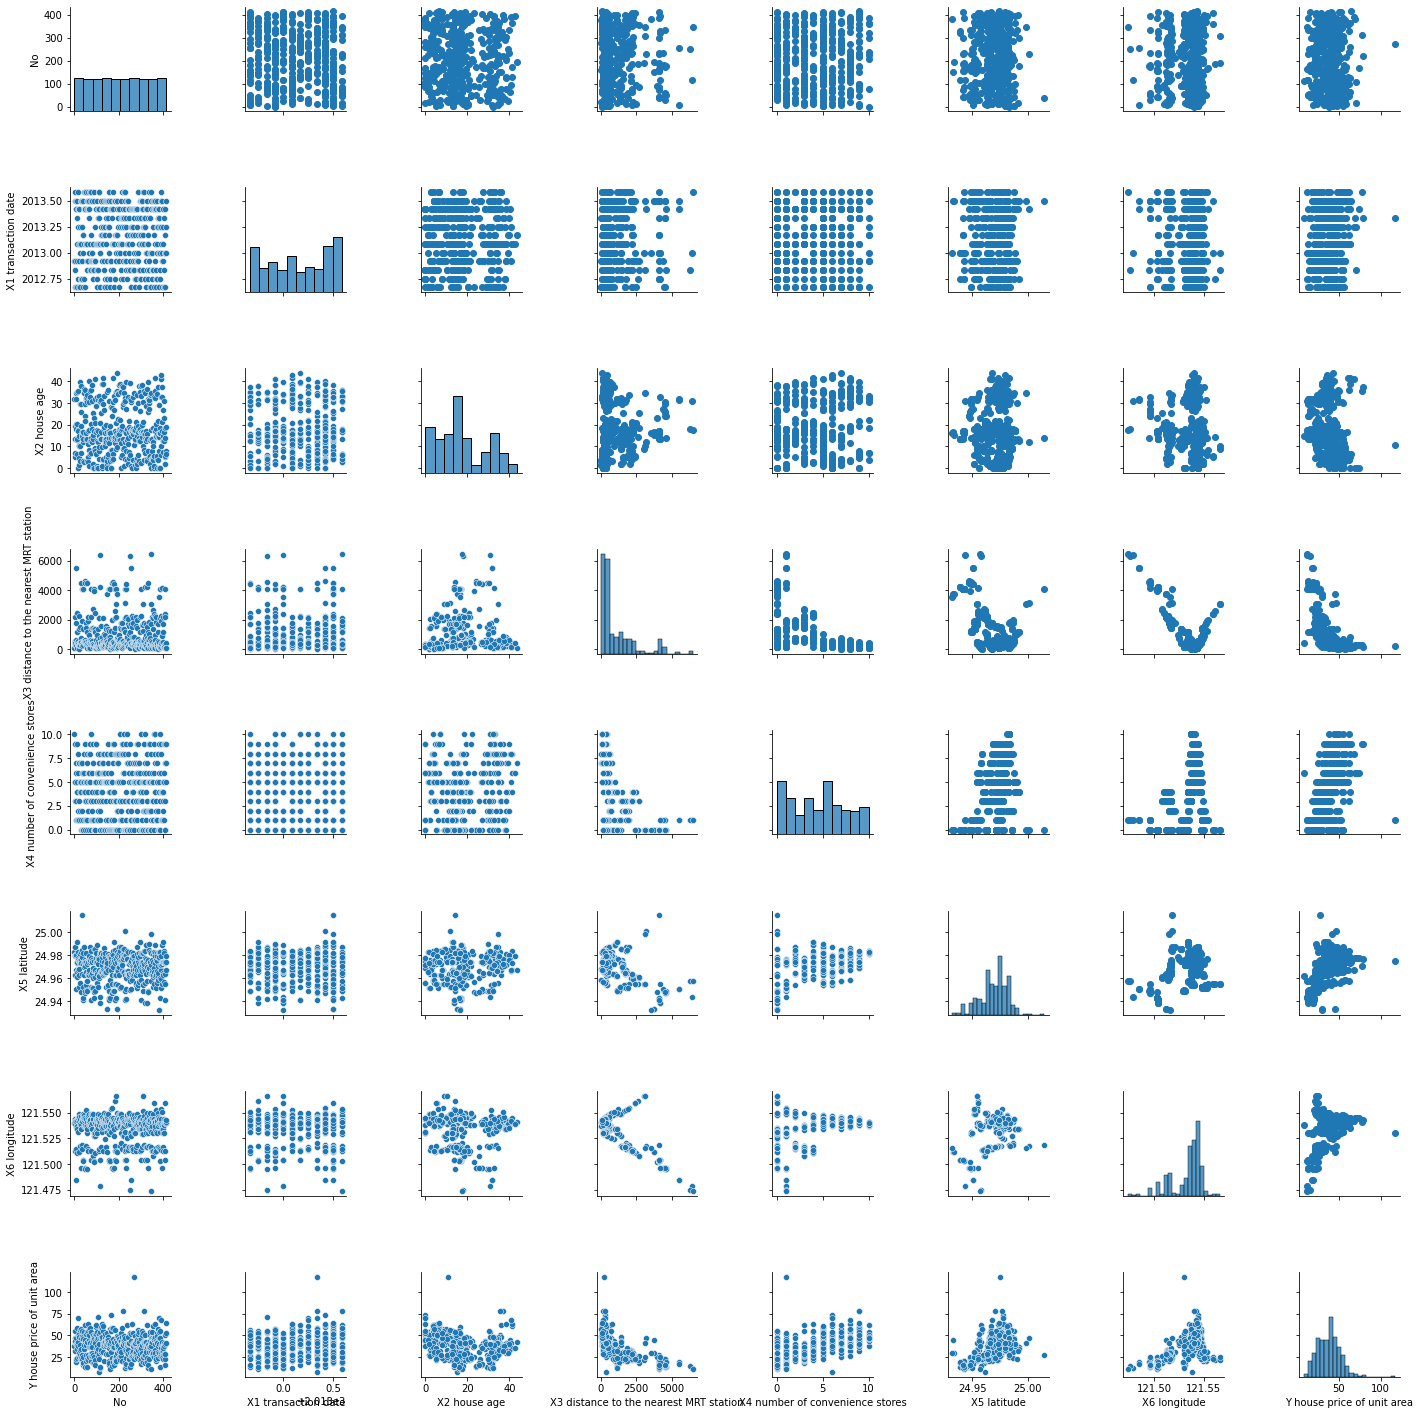

In [6]:
g= sns.pairplot(df)
g.map_upper(plt.scatter)

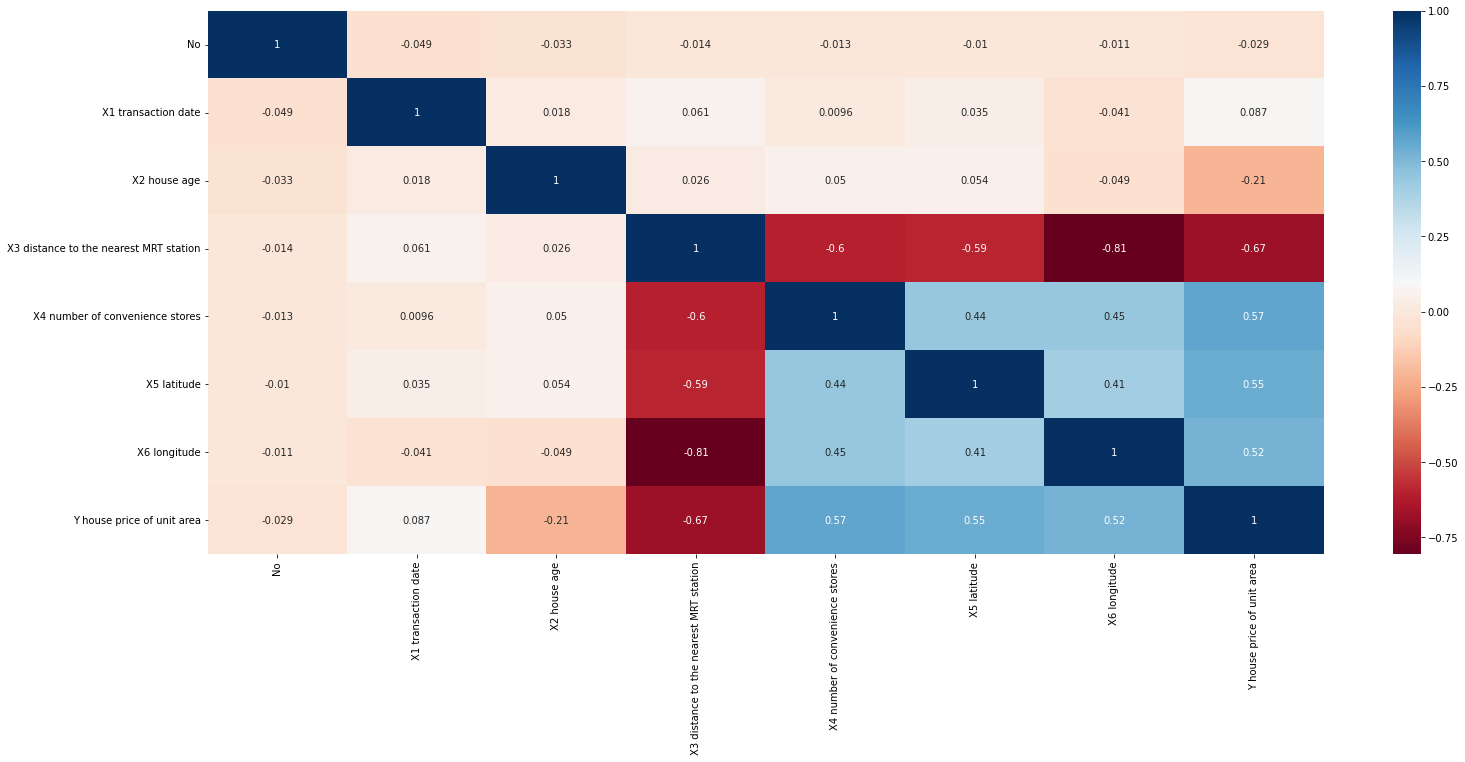

In [7]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

# 📈 Training a Linear Regression Model

## Step5: Determine the Features & Target Variable

In [8]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

## Step6: Preprocessing

In [9]:
PF = PolynomialFeatures(degree=2, include_bias=False)

X_poly_features = PF.fit_transform(X)

In [10]:
X.shape

(414, 7)

In [11]:
X_poly_features.shape

(414, 35)

## Step7: Split the Dataset to Train & Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_poly_features, y, test_size=0.3, random_state=101)

## Step8: Train the Model

In [13]:
polymodel = LinearRegression()

polymodel.fit(X_train, y_train)

LinearRegression()

## Step9: Predicting Test Data

In [14]:
y_pred = polymodel.predict(X_test)

## Step10: Evaluating the Model

In [15]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).sort_values('Residuals', ascending=True)

,Y_Test,Y_Pred,Residuals
4,43.1,56.576941,-13.476941
271,26.5,39.968529,-13.468529
31,25.0,37.389383,-12.389383
357,44.9,56.832003,-11.932003
392,35.3,46.915231,-11.615231
...,...,...,...
16,70.1,62.313376,7.786624
160,57.8,49.751364,8.048636
114,53.3,43.803251,9.496749
128,60.7,44.105708,16.594292


In [16]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)


In [17]:
pd.DataFrame([MAE,MSE,RMSE],['MAE','MSE','RMSE'],['METRICS'])

,METRICS
MAE,4.490908
MSE,32.402896
RMSE,5.692354


### 🟣Compare to the simple linear regression:

split data

In [18]:
XL_train, XL_test, yl_train, yl_test = train_test_split(X, y, test_size=0.3, random_state=101)

model

In [19]:
linear_model = LinearRegression()

Train model

In [20]:
linear_model.fit(XL_train, yl_train)

LinearRegression()

Fit model

In [21]:
yl_pred = linear_model.predict(XL_test)

Evaluate model

In [22]:
MAE_simple = metrics.mean_absolute_error(yl_test, yl_pred)
MSE_simple = metrics.mean_squared_error(yl_test, yl_pred)
RMSE_simple = np.sqrt(MSE_simple)

Compare Poly and Simple

In [23]:
pd.DataFrame( { 'Poly Metrics': [MAE, MSE, RMSE], 'Simple Metrics':[MAE_simple, MSE_simple, RMSE_simple] } , index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,4.490908,5.373025
MSE,32.402896,45.880307
RMSE,5.692354,6.773500


## Step11: Adjusting Model Parameters

In [25]:
train_RMSE_list=[]
test_RMSE_list=[]

for d in range(1,15):
    
    # make polynominal fatures
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit_transform(X)
    
    # split data
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # model
    model=LinearRegression()

    # fit model
    model.fit(X_train, y_train)
    
    # prediction on train data
    y_train_pred=model.predict(X_train)

    # prediction on test data
    y_test_pred=model.predict(X_test)

    # RMSE train data
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    # RMSE test data
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
        

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)


## Step12: Plot the Polynomial degree VS RMSE

Text(0.5, 0, 'Polynomial Degree')

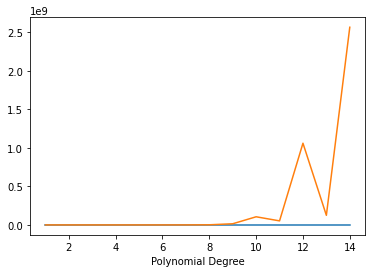

In [29]:
plt.plot(range(1,15), train_RMSE_list[:14], label='Train RMSE')
plt.plot(range(1,15), test_RMSE_list[:14], label='Test RMSE')

plt.xlabel('Polynomial Degree')

## Step13: Finalizing Model Parameters:

Text(0.5, 0, 'Polynomial Degree')

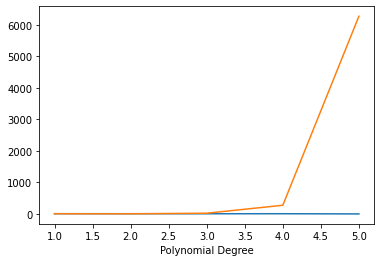

In [30]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')

In [31]:
# d = 2 is a good choice

## Step14: Saving the Model

In [32]:
final_model = polymodel
final_model.fit(X , y)

LinearRegression()

### 🟣Deployment

In [34]:
dump(final_model , 'pm.joblib' )

['pm.joblib']

In [36]:
load_model = load('lm.joblib')

In [41]:
e = [[	2000,	35,	83,	10,	26,	120,	37.9]]


In [42]:
p = load_model.predict(e)
print(f'prdicted charges is: {p[0]}')

prdicted charges is: 12553.431406868349


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Best Wishes!, Filoger


